In [1]:
# Importing in each cell because of the kernel restarts.
import scrapy
from scrapy.crawler import CrawlerProcess


class CLSpider(scrapy.Spider):
    # Naming the spider is important if you are running more than one spider of
    # this class simultaneously.
    name = "CL"
    
    # URL(s) to start with.
    start_urls = [
        'https://dallas.craigslist.org/d/real-estate/search/rea',
    ]

    # Use XPath to parse the response we get.
    def parse(self, response):
        
        # Iterate over every <article> element on the page.
        for posting in response.xpath('//p'):
            
            # Yield a dictionary with the values we want.
            yield {
                # This is the code to choose what we want to extract
                # You can modify this with other Xpath expressions to extract other information from the site
                'title': posting.xpath('a[@class="result-title hdrlnk"]/text()').extract_first(),
                'date': posting.xpath('time[@class="result-date"]/text()').extract_first(),
                'price': posting.xpath('span/span[@class="result-price"]/text()').extract_first()
            }
        next_page = response.xpath('//div/div/span[@class="buttons"]/a[3][@href]').extract_first()
        
        pagenum = int(re.findall(r'\d+',next_page)[0])
          
        if next_page is not None and pagenum < 10:
            next_page = response.urljoin(next_page)
            yield scrapy.Request(next_page, callback=self.parse)

# Tell the script how to run the crawler by passing in settings.
process = CrawlerProcess({
    'FEED_FORMAT': 'json',         # Store data in JSON format.
    'FEED_URI': 'CLdata.json',  # Name our storage file.
    'ROBOTSTXT_OBEY': True,
    'USER_AGENT': 'ThinkfulDataScienceBootcamp_Tom (thinkful.com)',
    'AUTOTHROTTLE_ENABLED': True,
    'HTTPCACHE_ENABLED': True,
    'LOG_ENABLED': False           # Turn off logging for now.
})

# Start the crawler with our spider.
process.crawl(CLSpider)
process.start()
print('Success!')

Success!


In [2]:
import pandas as pd

# Turning JSON into Data Frame
house = pd.read_json('CLdata.json')
print(house.shape)
house.head()

(120, 3)


,date,price,title
0,Jul 11,$1500,Rent To Own Houses - $1500+ 3+ Beds 2+ Baths
1,Jul 11,$265000,"Arlington, Home for Sale - 4bd 2ba"
2,Jul 11,$210000,Move-In Ready 4/2/2 Home. Rent 2 Own. Lease 2 Buy
3,Jul 11,$215000,Awesome 4/2/2 home. Rent 2 Own. Lease with opt...
4,Jul 11,$12,Motel for sale by OWNER! Expand! $$$$


In [3]:
import re

# I did not expect to have so little data. 
# Scrub the dollar sign away
house.price = house.price.map(lambda x: None if x == None else int(re.sub('\$', '', str(x))))
house.head()

,date,price,title
0,Jul 11,1500,Rent To Own Houses - $1500+ 3+ Beds 2+ Baths
1,Jul 11,265000,"Arlington, Home for Sale - 4bd 2ba"
2,Jul 11,210000,Move-In Ready 4/2/2 Home. Rent 2 Own. Lease 2 Buy
3,Jul 11,215000,Awesome 4/2/2 home. Rent 2 Own. Lease with opt...
4,Jul 11,12,Motel for sale by OWNER! Expand! $$$$


In [4]:
house = house.fillna(0)

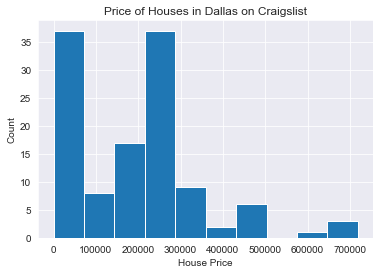

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

plt.hist(house.price, bins=10)
plt.xlabel('House Price')
plt.ylabel('Count')
plt.title('Price of Houses in Dallas on Craigslist')
plt.show()